In [15]:
!pip install tensorflow

  Using cached keras-3.11.2-py3-none-any.whl.metadata (5.9 kB)
Using cached keras-3.11.2-py3-none-any.whl (1.4 MB)


In [16]:
!pip install scikit-learn

In [ ]:
#0. 작업준비
#데이터 분석
#1. 데이터 수집
#2. 데이터 전처리(EDA)
#3. 모델설계
#4. 모델 학습
#5. 모델 검증 및 테스트

In [9]:
#0. 작업 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#데이터 분할
from sklearn.model_selection import train_test_split
#모델 모듈(딥러닝)
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,SimpleRNN,LSTM,GRU,BatchNormalization,Flatten
from keras.optimizers import Adam,RMSprop,SGD,Adagrad
from keras.losses import binary_crossentropy,categorical_crossentropy,sparse_categorical_crossentropy,mean_squared_error
#모델 학습
from keras.callbacks import EarlyStopping,ModelCheckpoint
#모델 로드
from keras.models import load_model
#성능검토 
from sklearn.metrics import r2_score,classification_report,f1_score,mean_squared_error

In [3]:
from keras.datasets import fashion_mnist
(x_data,y_data),(tt_x,tt_y)=fashion_mnist.load_data()

In [4]:
tr_x,val_x,tr_y,val_y=train_test_split(x_data,y_data,train_size=0.8,stratify=y_data)

In [5]:
np.unique(tr_x/255)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [6]:
tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape,val_x.shape,val_y.shape

((48000, 28, 28),
 (48000,),
 (10000, 28, 28),
 (10000,),
 (12000, 28, 28),
 (12000,))

In [7]:
e_tr_x=tr_x/255
e_tt_x=tt_x/255
e_val_x=val_x/255

In [8]:
np.unique(tr_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
from keras.layers import Flatten
m=Sequential()
m.add(Input(shape=tr_x.shape[1:]))
m.add(Flatten())
m.add(Dense(100,activation='sigmoid'))#은닉
m.add(Dense(100,activation='sigmoid'))#은닉
m.add(Dense(10,activation='softmax'))#출력
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
m.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [11]:
es=EarlyStopping(patience=5,restore_best_weights=True,verbose=1)
ck=ModelCheckpoint('best_m.keras',save_best_only=True,verbose=1)

In [12]:
m.fit(e_tr_x,tr_y,validation_data=(e_val_x,val_y),epochs=100,callbacks=[es,ck])

Epoch 1/100
1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - acc: 0.2397 - loss: 2.2467
Epoch 1: val_loss improved from inf to 1.88916, saving model to best_m.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.2405 - loss: 2.2461 - val_acc: 0.4880 - val_loss: 1.8892
Epoch 2/100
1462/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - acc: 0.5714 - loss: 1.7324
Epoch 2: val_loss improved from 1.88916 to 1.35186, saving model to best_m.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - acc: 0.5719 - loss: 1.7287 - val_acc: 0.6360 - val_loss: 1.3519
Epoch 3/100
1475/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - acc: 0.6405 - loss: 1.2717
Epoch 3: val_loss improved from 1.35186 to 1.07664, saving model to best_m.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - acc: 0.6407 - loss: 1.2704 - val_acc: 0.6823 - val_loss: 1.0766
Epoch 4/100
1465/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - acc: 0.6800 - loss: 1.0349
Epoch 4: val_loss improved from 1.07664 to 0.92135, saving model to best_m.keras
1500/

In [13]:
m

<Sequential name=sequential, built=True>

In [14]:
m.evaluate(tr_x,tr_y)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - acc: 0.8300 - loss: 0.5770


[0.5783616900444031, 0.8287083506584167]

In [15]:
l_m=load_model('best_m.keras')

In [16]:
l_m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,612 (350.05 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
print(m.evaluate(tr_x,tr_y))
print(l_m.evaluate(tr_x,tr_y))

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - acc: 0.8300 - loss: 0.5770
[0.5783616900444031, 0.8287083506584167]
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - acc: 0.8300 - loss: 0.5770
[0.5783616900444031, 0.8287083506584167]


In [18]:
from keras.optimizers import SGD
sgd=SGD(0.001)

In [19]:
e_tr_x.shape

(48000, 28, 28)

In [20]:
m=Sequential()
m.add(Input(shape=tr_x.shape[1:]))
m.add(Flatten())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(BatchNormalization())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(BatchNormalization())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(BatchNormalization())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(BatchNormalization())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(BatchNormalization())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(BatchNormalization())
m.add(Dense(50,activation='sigmoid'))#은닉
m.add(Dense(10,activation='softmax'))#출력
m.summary()
m.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['acc'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,260 (219.77 KB)

 Trainable params: 55,660 (217.42 KB)

 Non-trainable params: 600 (2.34 KB)

In [21]:
es=EarlyStopping(patience=5,restore_best_weights=True,verbose=1)
ck=ModelCheckpoint('best_m.keras',save_best_only=True,verbose=1)

In [22]:
tr_x.shape

(48000, 28, 28)

In [23]:
hy=m.fit(tr_x,tr_y,validation_data=(val_x,val_y),epochs=100)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3147 - loss: 2.0601 - val_acc: 0.6378 - val_loss: 1.5843
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.6401 - loss: 1.5204 - val_acc: 0.7024 - val_loss: 1.2718
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.6975 - loss: 1.2467 - val_acc: 0.7271 - val_loss: 1.0896
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.7173 - loss: 1.0874 - val_acc: 0.7472 - val_loss: 0.9525
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7430 - loss: 0.9604 - val_acc: 0.7442 - val_loss: 0.8930
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7393 - loss: 0.8947 - val_acc: 0.7580 - val_loss: 0.8022
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7555 - loss: 0.8279 - val_acc: 0.7696 - val_loss: 0.7575
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - acc: 0.7639 - loss: 0.7767 - val_acc: 0.7811 - val_loss: 0.7284
Epoch 9/100
1500/1500 ━━━━━━━━━━

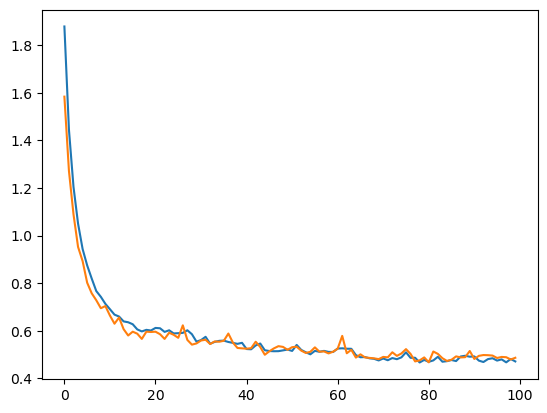

In [24]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

# 데이터를 이용하여 다중 분류기를 완성하시오 
- 모델의 일반화 성능은 95점 이상 을 원한다.
- 옵티마이저 자유
- 모델구조 자유(단 CNN 안됩니다.)
- 11시 30분까지 모델 결정
- 모델 저장파일 제출

# CNN

In [27]:
#0. 작업 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#데이터 분할
from sklearn.model_selection import train_test_split
#모델 모듈(딥러닝)
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Dropout,SimpleRNN,LSTM,GRU,BatchNormalization,Flatten
from keras.optimizers import Adam,RMSprop,SGD,Adagrad
from keras.losses import binary_crossentropy,categorical_crossentropy,sparse_categorical_crossentropy,mean_squared_error
#모델 학습
from keras.callbacks import EarlyStopping,ModelCheckpoint
#모델 로드
from keras.models import load_model
#성능검토 
from sklearn.metrics import r2_score,classification_report,f1_score,mean_squared_error

In [28]:
from keras.datasets import cifar10

In [29]:
(x_data,y_data),(tt_x,tt_y)=cifar10.load_data()

In [30]:
tr_x,val_x,tr_y,val_y=train_test_split(x_data,y_data,train_size=0.8,stratify=y_data)

In [31]:
tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape,val_x.shape,val_y.shape

((40000, 32, 32, 3),
 (40000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

In [32]:
np.unique(tr_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
m=Sequential()
m.add(Input(shape=tr_x.shape[1:]))
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(100,activation='relu'))
m.add(Dense(100,activation='relu'))
m.add(Dense(10,activation='softmax'))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [34]:
m.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │         307,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,510 (1.25 MB)

 Trainable params: 328,510 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
es=EarlyStopping(patience=10,restore_best_weights=True)
ck=ModelCheckpoint('best_m.keras',save_best_only=True)

In [36]:
hy=m.fit(tr_x,tr_y,validation_data=(val_x,val_y),epochs=100,callbacks=[es,ck])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.1822 - loss: 16.6883 - val_acc: 0.2588 - val_loss: 2.1927
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2333 - loss: 2.2147 - val_acc: 0.1770 - val_loss: 2.1539
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.1854 - loss: 2.1523 - val_acc: 0.2133 - val_loss: 2.0826
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2017 - loss: 2.1041 - val_acc: 0.1005 - val_loss: 2.3055
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.0972 - loss: 2.3039 - val_acc: 0.1000 - val_loss: 2.3030
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.0995 - loss: 2.3031 - val_acc: 0.1002 - val_loss: 2.3029
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.0988 - loss: 2.3027 - val_acc: 0.1001 - val_loss: 2.3029
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.1005 - loss: 2.3032 - val_acc: 0.1000 - val_loss: 2.3035
Epoch 9/100
1250/1250 ━━━━━━━━━

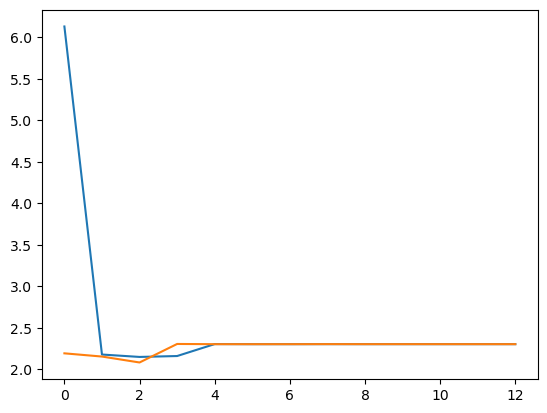

In [37]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

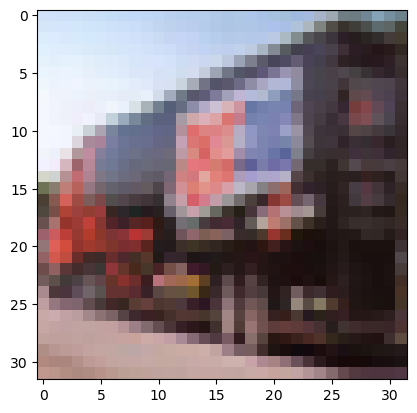

In [38]:
plt.imshow(tr_x[0])

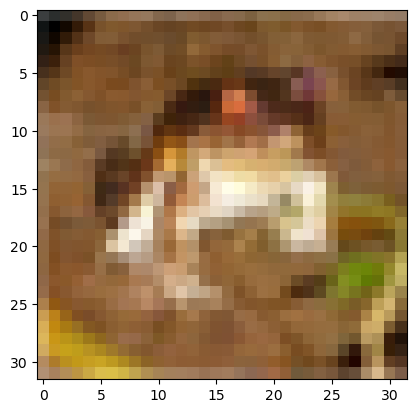

In [39]:
plt.imshow(x_data[0])

In [ ]:
Conv2D()#커널의 크기(이미지 수용 영역), 커널의 갯수(데이터를 바라보는 관점), 이동수(영역의 간격)
MaxPooling2D()#연산감소 커널크기는 일반적로(2X2)권장

In [ ]:
#입력 데이터(이미지(가로,세로,채널수))

In [80]:
(_,_),(X,y)=fashion_mnist.load_data()

In [82]:
#X.shape->이미지화 shape(28,28,1)

(10000, 28, 28)

In [86]:
X.reshape(-1,28,28,1).shape

(10000, 28, 28, 1)

In [88]:
tr_x.shape(R,G,B)

(40000, 32, 32, 3)

In [92]:
tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape,val_x.shape,val_y.shape

((40000, 32, 32, 3),
 (40000, 1),
 (10000, 32, 32, 3),
 (10000, 1),
 (10000, 32, 32, 3),
 (10000, 1))

In [94]:
m=Sequential()
m.add(Input(shape=tr_x.shape[1:]))#(32,32,3)
m.add(Conv2D(10,3,1,padding='same',activation='relu'))#(32,32,10)
m.add(MaxPooling2D(2))#(16,16,10)
m.add(Conv2D(10,3,1,padding='same',activation='relu'))#(16,16,10)
m.add(MaxPooling2D(2))#(8,8,10)
m.add(Conv2D(10,3,1,padding='same',activation='relu'))#(8,8,10)
m.add(MaxPooling2D(2))#(4,4,10)
m.add(Conv2D(10,3,1,padding='same',activation='relu'))#(4,4,10)
m.add(MaxPooling2D(2))#(2,2,10)
m.add(Conv2D(10,3,1,padding='same',activation='relu'))#(2,2,10)
m.add(MaxPooling2D(2))#(1,1,10)
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 10)            │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 10)            │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 10)            │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,030 (15.74 KB)

 Trainable params: 4,030 (15.74 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
from keras.metrics import Accuracy,F1Score
from sklearn.metrics import classification_report

In [106]:
f1sc=F1Score()

In [108]:
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc',f1sc])

In [110]:
m.fit(tr_x,tr_y,epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - f1_score: 0.1942 - loss: 2.3840 - 정확도: 0.0000e+00
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - f1_score: 0.1954 - loss: 1.7119 - 정확도: 0.0000e+00
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - f1_score: 0.1955 - loss: 1.5633 - 정확도: 0.0000e+00
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - f1_score: 0.1955 - loss: 1.5005 - 정확도: 0.0000e+00
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - f1_score: 0.1955 - loss: 1.4359 - 정확도: 0.0000e+00
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - f1_score: 0.1955 - loss: 1.4076 - 정확도: 0.0000e+00
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - f1_score: 0.1955 - loss: 1.3772 - 정확도: 0.0000e+00
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - f1_score: 0.1955 - loss: 1.3398 - 정확도: 0.0000e+00
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - f1_score: 0.1955 - loss: 1.3164 - 정확도: 0.0000e+00
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [116]:
tr_x.shape,tt_x.shape,val_x.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [118]:
#0~255
s_tr_x=tr_x/255
s_tt_x=tt_x/255
s_val_x=val_x/255

In [120]:
s_tr_x.shape,s_tt_x.shape,s_val_x.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [122]:
m=Sequential()
m.add(Input(shape=tr_x.shape[1:]))#(32,32,3)
m.add(Conv2D(10,3,1,padding='same',activation='relu'))#(32,32,10)
m.add(MaxPooling2D(2))#(16,16,10)
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [124]:
hy=m.fit(s_tr_x,tr_y,validation_data=(s_val_x,val_y),epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3653 - loss: 1.8035 - val_acc: 0.5063 - val_loss: 1.4357
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5235 - loss: 1.3772 - val_acc: 0.5181 - val_loss: 1.3613
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5632 - loss: 1.2647 - val_acc: 0.5650 - val_loss: 1.2525
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.5871 - loss: 1.1906 - val_acc: 0.5567 - val_loss: 1.2644
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6019 - loss: 1.1555 - val_acc: 0.5752 - val_loss: 1.2250
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6080 - loss: 1.1204 - val_acc: 0.5775 - val_loss: 1.2056
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6233 - loss: 1.0815 - val_acc: 0.5900 - val_loss: 1.1767
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6339 - loss: 1.0582 - val_acc: 0.5930 - val_loss: 1.1802
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━

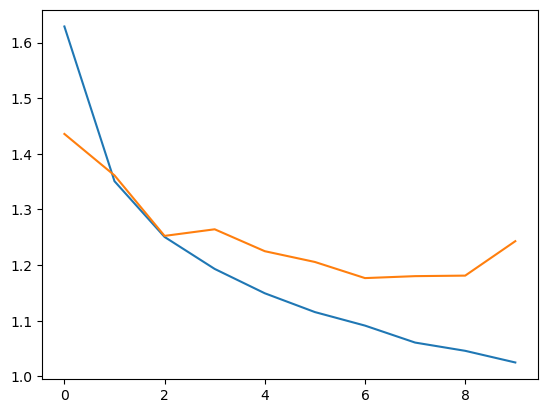

In [126]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

# CNN 모델을 만들어서 다중 분류문제를 해결하시오 
- 1차 목표 정확도 0.4도달
- 2차 목표 금주 까지 본인이 생각하기에는 최고의 모델을 완성하시오

# RNN 모델 학습 및 활용 
- 텍스트 데이터 관점
lecture_kjh@naver.com

In [140]:
df=pd.read_csv('./data2/data.csv')
df

,name,genre,content
0,올드보이,스릴러,술 좋아하고 떠들기 좋아하는 오.대.수. 본인의 이름풀이를 오늘만 대충 수습하며 살...
1,노트북,로맨스,"17살, ‘노아’는 밝고 순수한 ‘앨리’를 보고 첫눈에 반한다. 빠른 속도로 서로에..."
2,미션임파서블,액션,"도난당한 핵무기를 되찾아 오는 위험천만한 작전 중, 에단 헌트(톰 크루즈)는 임무를..."
3,니모를찾아서,애니메이션,“디즈니`픽사 최고의 애니메이션이 3D로 다시 찾아온다!” 호기심 가득한 아기 물고...
4,탑건,액션,해군 최신 전투기 F-14기를 모는 젊은 조종사 매버릭 대위(톰 크루즈)는 최고의 ...
5,친절한금자씨,스릴러,주변 사람들의 시선을 단번에 사로잡을 만큼 뛰어난 미모의 소유자인 금자(이영애)는 ...
6,반지의제왕,판타지,모든 힘을 지배할 악의 군주 ‘사우론’의 절대반지가 깨어나고 악의 세력이 세상을 지...
7,신세계,범죄,경찰청 수사 기획과 강과장(최민식)은 국내 최대 범죄 조직인 '골드문'이 기업형 조...
8,아저씨,NaN,불행한 사건으로 아내를 잃고 세상을 등진 채 전당포를 꾸려가며 외롭게 살아가는 전직...
9,해리포터,NaN,해리 포터(다니엘 래드클리프 분)는 위압적인 버논 숙부(리챠드 그리피스 분)와 냉담...


In [142]:
df.content

0     술 좋아하고 떠들기 좋아하는 오.대.수. 본인의 이름풀이를 오늘만 대충 수습하며 살...
1     17살, ‘노아’는 밝고 순수한 ‘앨리’를 보고 첫눈에 반한다. 빠른 속도로 서로에...
2     도난당한 핵무기를 되찾아 오는 위험천만한 작전 중, 에단 헌트(톰 크루즈)는 임무를...
3     “디즈니`픽사 최고의 애니메이션이 3D로 다시 찾아온다!” 호기심 가득한 아기 물고...
4     해군 최신 전투기 F-14기를 모는 젊은 조종사 매버릭 대위(톰 크루즈)는 최고의 ...
5     주변 사람들의 시선을 단번에 사로잡을 만큼 뛰어난 미모의 소유자인 금자(이영애)는 ...
6     모든 힘을 지배할 악의 군주 ‘사우론’의 절대반지가 깨어나고 악의 세력이 세상을 지...
7     경찰청 수사 기획과 강과장(최민식)은 국내 최대 범죄 조직인 '골드문'이 기업형 조...
8     불행한 사건으로 아내를 잃고 세상을 등진 채 전당포를 꾸려가며 외롭게 살아가는 전직...
9     해리 포터(다니엘 래드클리프 분)는 위압적인 버논 숙부(리챠드 그리피스 분)와 냉담...
10    아내를 구해야 하는 분노의 로맨티스트 ‘장고’ 그를 돕는 정의의 바운티 헌터 ‘닥터...
11    모태솔로 팀(돔놀 글리슨)은 성인이 된 날, 아버지(빌 나이)로부터 놀랄만한 가문의...
12    위험한 미션들을 무사히 수행한 후 평화롭게 우주를 항해하던 거대 함선 엔터프라이즈호...
13    옵티머스 프라임은 더 이상 인간의 편이 아니다. 트랜스포머의 고향 사이버트론의 재건...
14    비가 오는 날 다시 돌아오겠다는 믿기 힘든 약속을 남기고 세상을 떠난 ‘수아’. 그...
15    MI6를 떠난 이후 ‘매들린’(레아 세이두)과 평화로운 일상을 즐기던 ‘제임스 본드...
16    세계 각국의 정부와 경제가 완전히 붕괴된 미래가 다가온다. 지난 20세기에 범한 잘...
17    더욱 강력해진 포스로 돌아온 ‘레이’는 전 우주를 어둠의 힘으로 지배하려는 

In [144]:
df.content[0]

"술 좋아하고 떠들기 좋아하는 오.대.수. 본인의 이름풀이를 오늘만 대충 수습하며 살자'라고 이죽거리는 이 남자는 아내와 어린 딸아이를 가진 지극히 평범한 샐러리맨이다. 어느 날, 술이 거나하게 취해 집에 돌아가는 길에 존재를 알 수 없는 누군가에게 납치, 사설 감금방에 갇히게 되는데. 언뜻 보면 싸구려 호텔방을 연상케 하는 감금방. 중국집 군만두만을 먹으며 8평이라는 제한된 공간에서 그가 할 수 있는 일이라곤, 텔레비전 보는 게 전부. 그렇게 1년이 지났을 무렵, 뉴스를 통해 나오는 아내의 살해소식. 게다가 아내의 살인범으로 자신이 지목되고 있음을 알게 된 오대수는 자살을 감행하지만 죽는 것조차 그에겐 용납 되지 않는다. 오대수는 복수를 위해 체력단련을 비롯, 자신을 가둘만한 사람들, 사건들을 모조리 기억 속에서 꺼내 악행의 자서전을 기록한다. 한편, 탈출을 위해 감금방 한쪽 구석을 쇠젓가락으로 파기도 하는데.. 감금 15년을 맞이하는 해, 마침내 사람 몸 하나 빠져나갈 만큼의 탈출구가 생겼을 때, 어이없게도 15년 전 납치됐던 바로 그 장소로 풀려나 있는 자신을 발견하게 된다. 우연히 들른 일식집에서 갑자기 정신을 잃어버린 오대수는 보조 요리사 미도 집으로 가게 되고, 미도는 오대수에게 연민에서 시작한 사랑의 감정을 키워나가게 된다. 한편 감금방에서 먹던 군만두에서 나온 청룡이란 전표 하나로 찾아낸 7.5층 감금방의 정체를 찾아내고... 마침내, 첫 대면을 하는 날 복수심으로 들끓는 대수에게 우진은 너무나 냉정하게 게임을 제안한다. 자신이 가둔 이유를 5일 안에 밝혀내면 스스로 죽어주겠다는 것. 대수는 이 지독한 비밀을 풀기 위해, 사랑하는 연인, 미도를 잃지 않기 위해 5일간의 긴박한 수수께끼를 풀어나가야 한다. 도대체 이우진은 누구이며? 이우진이 오대수를 15년 동안이나 감금한 이유는 뭘까? 밝혀진 비밀 앞에 두 남자의 운명은 과연 어떻게 되는 것일까? "

In [2]:
# 데이터 정리 및 확인
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(X_data,y_data),(tt_x,tt_y)=fashion_mnist.load_data()

tr_x,val_x,tr_y,val_y=train_test_split(X_data,y_data,test_size=0.2)
s_tr_x=tr_x/255
s_tt_x=tt_x/255
s_val_x=val_x/255

s_tr_x.shape

(48000, 28, 28)

In [3]:
e_tr_x=s_tr_x.reshape(-1,28,28,1)
e_tt_x=s_tt_x.reshape(-1,28,28,1)
e_val_x=s_val_x.reshape(-1,28,28,1)

In [4]:
e_tr_y=tr_y.reshape(-1,1)
e_tr_x.shape,e_tr_y.shape

((48000, 28, 28, 1), (48000, 1))

In [34]:
from keras.utils import to_categorical
e_tr_y=to_categorical(tr_y)
e_tt_y=to_categorical(tt_y)
e_val_y=to_categorical(val_y)
e_tr_x.shape,e_tr_y.shape

((48000, 28, 28, 1), (48000, 10))

In [29]:
#cnn
m=Sequential()

m.add(Input(shape=e_tr_x.shape[1:])) # dataset.shape != data.shape
m.add(Conv2D(32,3,1,padding='same',activation='relu')) # (28,28,32)
m.add(MaxPooling2D(2)) # (14,14,32)
m.add(Conv2D(64,3,1,padding='same',activation='relu')) # (14,14,64)
m.add(MaxPooling2D(2)) # (7,7,64)
m.add(Conv2D(128,3,1,padding='same',activation='relu')) # (7,7,128)
m.add(MaxPooling2D(2)) # (3,3,128)
m.add(Conv2D(256,3,1,padding='same',activation='relu')) # (3,3,256)
m.add(MaxPooling2D(2)) # (1,1,256)
m.add(Flatten())
m.add(Dense(100,activation='relu'))
m.add(Dense(10,activation='softmax'))

m.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 414,550 (1.58 MB)

 Trainable params: 414,550 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
m.predict(e_tr_x).shape

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step


(48000, 10)

In [13]:
e_tr_y.shape

(48000, 10)

In [14]:
py=m.predict(e_tr_x)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step


In [15]:
ty=e_tr_y

In [17]:
np.argmax(py[0])

np.int64(2)

In [ ]:
np.argmax(py,axis=1)

array([2, 2, 2, ..., 2, 2, 2], shape=(48000,))

In [24]:
np.argmax(ty,axis=1)

array([4, 5, 3, ..., 9, 9, 3], shape=(48000,))

In [25]:
print(classification_report(np.argmax(py,axis=1),np.argmax(ty,axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.11      0.20     43271
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00      4725
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.10     48000
   macro avg       0.10      0.01      0.02     48000
weighted avg       0.90      0.10      0.18     48000



c:\Users\ksa\stenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ksa\stenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ksa\stenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [30]:
m.compile(loss='categorical_crossentropy',metrics=['acc'])

In [31]:
hy=m.fit(e_tr_x,e_tr_y,validation_split=0.2,epochs=10)
# 3회부터 정확도 90이상 - 1) 적합데이터 사용 / 2) 피처 도출에 추가적인 pulling -> 빠른 학습 / 3) 모델 복잡도 높음 -> 빠른 학습(overfitting 확률 ↑)

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - acc: 0.8139 - loss: 0.5044 - val_acc: 0.8810 - val_loss: 0.3284
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - acc: 0.8924 - loss: 0.2964 - val_acc: 0.8823 - val_loss: 0.3197
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - acc: 0.9104 - loss: 0.2473 - val_acc: 0.9017 - val_loss: 0.2825
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 35s 30ms/step - acc: 0.9191 - loss: 0.2175 - val_acc: 0.9073 - val_loss: 0.2631
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - acc: 0.9283 - loss: 0.1945 - val_acc: 0.9023 - val_loss: 0.3143
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - acc: 0.9345 - loss: 0.1787 - val_acc: 0.9104 - val_loss: 0.2988
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - acc: 0.9407 - loss: 0.1619 - val_acc: 0.9061 - val_loss: 0.3109
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - acc: 0.9449 - loss: 0.1526 - val_acc: 0.9094 - val_loss: 0.3032
Epoch 9/10
1200/1200 ━━━

In [36]:
tr_scs=m.evaluate(e_tr_x,e_tr_y)
val_scs=m.evaluate(e_val_x,e_val_y)
tt_scs=m.evaluate(e_tt_x,e_tt_y)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - acc: 0.9492 - loss: 0.1732
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.9146 - loss: 0.3475
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - acc: 0.9048 - loss: 0.3830


In [37]:
all_acc=abs(tr_scs[1]-val_scs[1])+abs(tr_scs[1]-tt_scs[1])+abs(tt_scs[1]-val_scs[1])
all_acc

0.08885836601257324

In [38]:
all_loss=abs(tr_scs[0]-val_scs[0])+abs(tr_scs[0]-tt_scs[0])+abs(tt_scs[0]-val_scs[0])
all_loss

0.4196821451187134

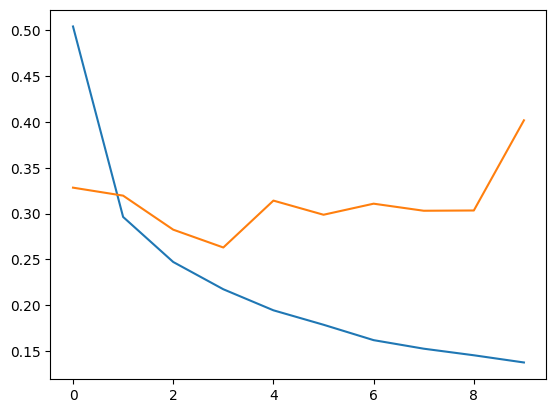

In [32]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])